In [66]:
# 히스토그램 : 계급별로 나눠서 갯수......
# bins 구간을 나누는 기준을 설정
# 연속형 데이터를 -> 범주형 데이터로 분류... 새로운 피쳐를 생성- 피쳐엔지니어링
# 데이터분석 또는 학습을 할때 다양한 데이터 특성을 찾아서 추가


In [67]:
import pandas as pd
df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [69]:
df[3][0]


'130.0'

In [70]:
for idx, data in enumerate(df[3]):
    try:
        float(data.strip())
    except Exception as e:
        print(df[3][idx])
        print(e)

?
could not convert string to float: '?'
?
could not convert string to float: '?'
?
could not convert string to float: '?'
?
could not convert string to float: '?'
?
could not convert string to float: '?'
?
could not convert string to float: '?'


In [71]:
df[3] = df[3].replace('?',pd.NA)

<Axes: >

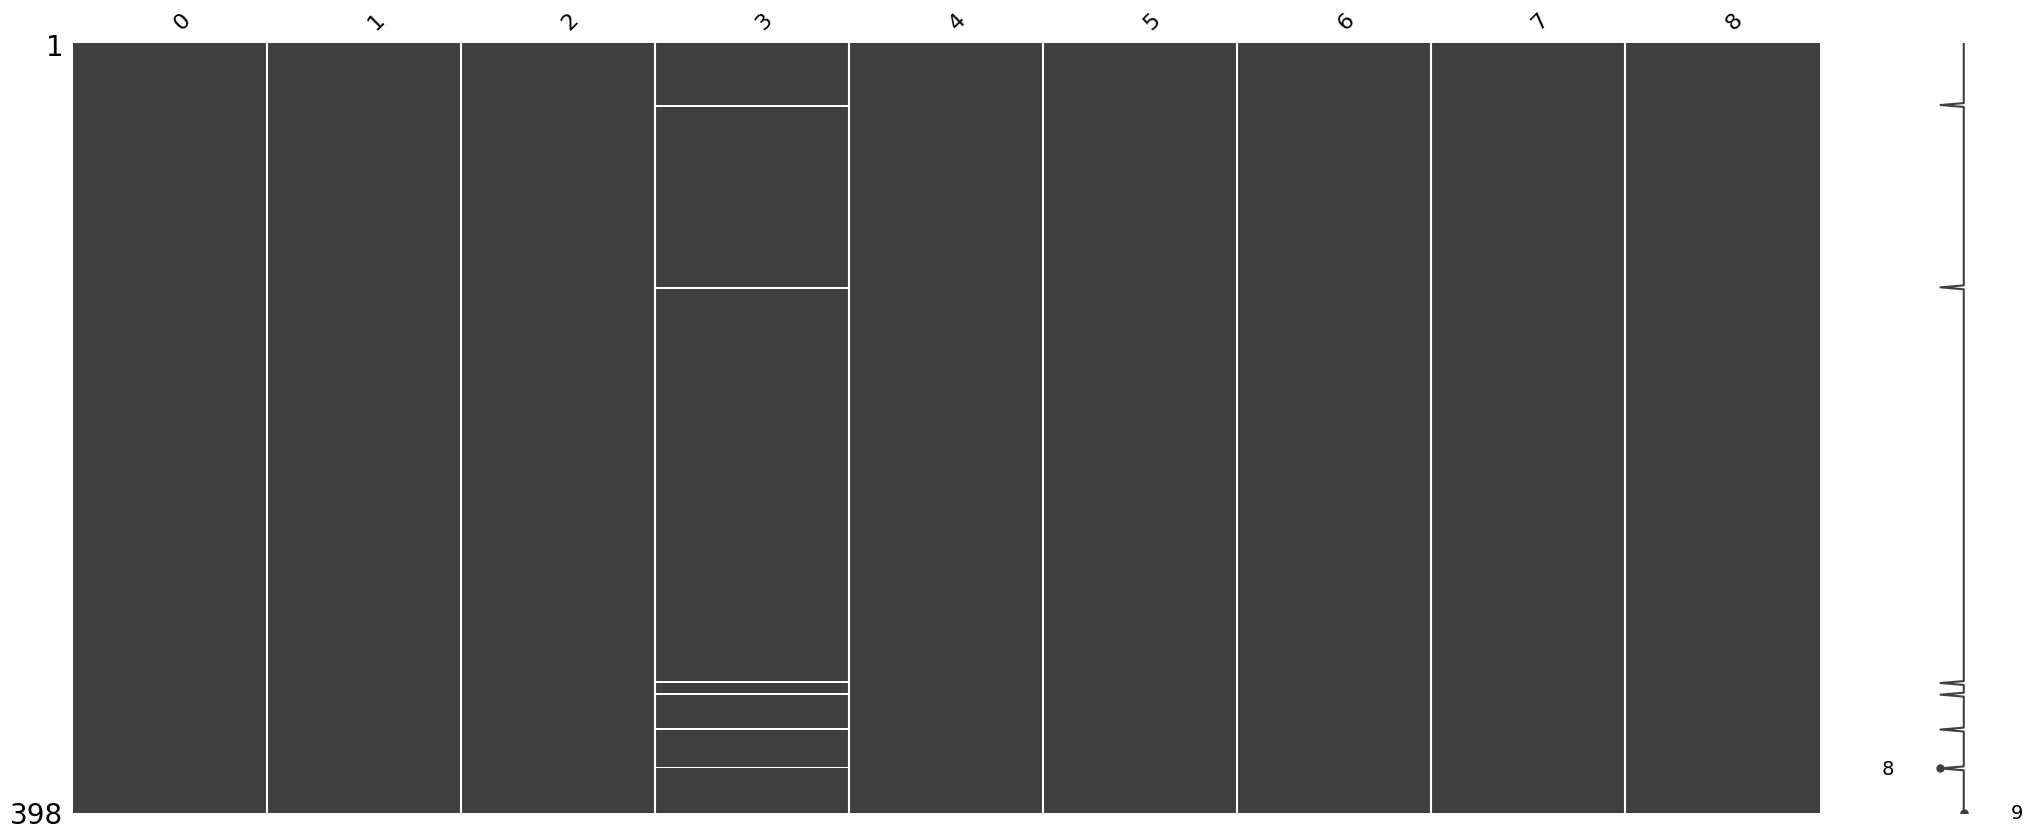

In [72]:
import missingno as msno
msno.matrix(df)

<Axes: >

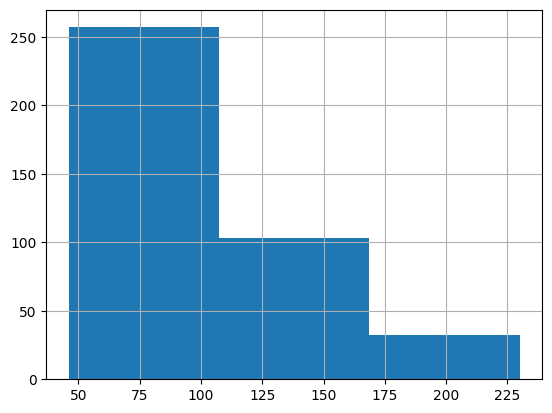

In [73]:
#결측치 제거
df = df.dropna()
df[3] = df[3].astype('float')
df[3].hist(bins=3)

In [74]:
#구간을 직접 지정 pd.cut Domain 지식이 있을때...
# 마력 low / median / hight
import numpy as np
cnt,bins = np.histogram(df[3],bins=3)
print(cnt,bins)
labels = ['low','medium','hight']
df['power'] = pd.cut(df[3],
    bins = bins,
    labels = labels
)
df.head()

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


,0,1,2,3,4,5,6,7,8,power
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,medium
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,medium
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,medium
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,medium
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,medium


In [75]:
# pd.qcut 분위수기반으로 동일한 개수로 분할
# 각구간별 샘플개수가 비슷
# 구간폭이 일정하지 않음
df['qpower'] = pd.qcut(df[3],q=3,labels=labels)
df.head()

,0,1,2,3,4,5,6,7,8,power,qpower
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,medium,hight
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,medium,hight
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,medium,hight
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,medium,hight
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,medium,hight


<Axes: xlabel='qpower', ylabel='count'>

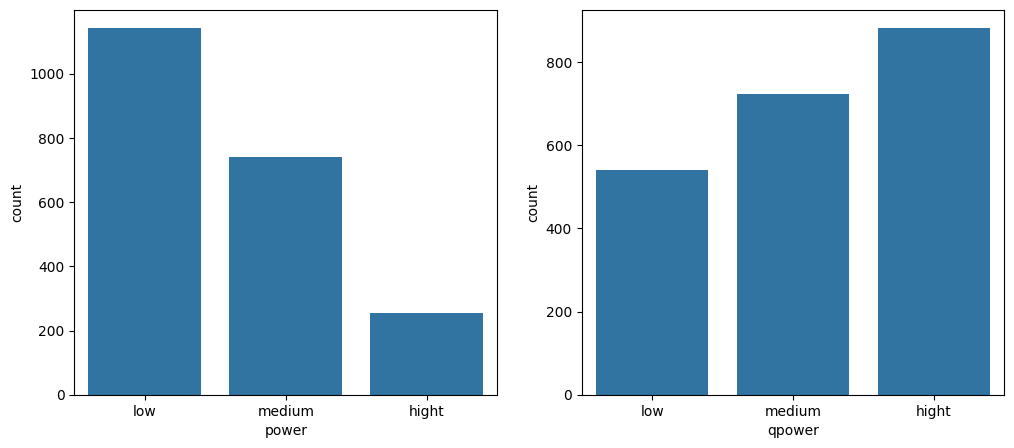

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(1,2,figsize=(12,5))
sns.countplot(data=df,x='power', ax=ax[0])
sns.countplot(data=df,x='qpower', ax=ax[1])


In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df = df.dropna(subset=['horsepower'], axis=0)                 # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers) 

[ 46.         107.33333333 168.66666667 230.        ]


In [ ]:
# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 

# horsepower 열, hp_bin 열의 첫 15행을 출력
df[['horsepower', 'hp_bin']].head(15)

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력
